In [2]:
# packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import string  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from tqdm import tnrange, tqdm_notebook
from itertools import combinations
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score
import pandas as pd

In [3]:
# set directories
inputpath=r'C:/Users/buca4591/Desktop/GIT/Applied_Empirical/task5/raw/data'
outputpath=r'C:/Users/buca4591/Desktop/GIT/Applied_Empirical/task5/analysis/output'

In [4]:
# upload the raw dataset 
data1 = pd.read_csv(inputpath+'/growthdata92_02.csv',sep=",",
                  lineterminator='\r',
                  error_bad_lines=False)

data2 = pd.read_csv(inputpath+'/growthdata02_11.csv',sep=",",
                  lineterminator='\r',
                  error_bad_lines=False)

C:\Users\buca4591\AppData\Local\Temp\ipykernel_13036\1614986813.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1 = pd.read_csv(inputpath+'/growthdata92_02.csv',sep=",",
C:\Users\buca4591\AppData\Local\Temp\ipykernel_13036\1614986813.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data2 = pd.read_csv(inputpath+'/growthdata02_11.csv',sep=",",


In [5]:
# drop NaNs
data1.dropna(inplace = True)
data2.dropna(inplace = True)


In [6]:
# drop unnecessary variables
data1 = data1.drop(["iso3", "Unnamed: 0"], axis=1)
data2 = data2.drop(["iso3", "Unnamed: 0"], axis=1)

In [7]:
# split train and test datasets 
data1_train, data1_test = train_test_split(data1, test_size=0.2, random_state=2409)
data2_train, data2_test = train_test_split(data2, test_size=0.2, random_state=2409)

In [8]:
# specify in\dependent variables
y = data2_train['growth']
X = data2_train.drop(["growth"], axis=1)

X_test = data2_test.drop('growth',axis = 1)
y_test = data2_test['growth']


Regression Trees

In [9]:
reg = DecisionTreeRegressor()
reg.fit(X,y)
print('Training score ',reg.score(X,y))
print('Test score ',reg.score(X_test,y_test))

# seems like overfitting lets limit the maximum depth 

Training score  1.0
Test score  -0.8245873599174318


In [10]:
reg = DecisionTreeRegressor(max_depth = 5)
reg.fit(X,y)
print('Training score ',reg.score(X,y))
print('Test score ',reg.score(X_test,y_test))

Training score  0.8611212428051016
Test score  -1.1301084930970355


In [11]:
# we should find the optimal depth

scores_dict = {}
for max_depth in np.arange(2,15):
    reg = DecisionTreeRegressor(max_depth = max_depth)
    scores_dict[max_depth] = -np.mean(cross_val_score(reg,data1.drop('growth',axis = 1),data1['growth'],
                                                      scoring = 'neg_mean_squared_error',cv = 10))

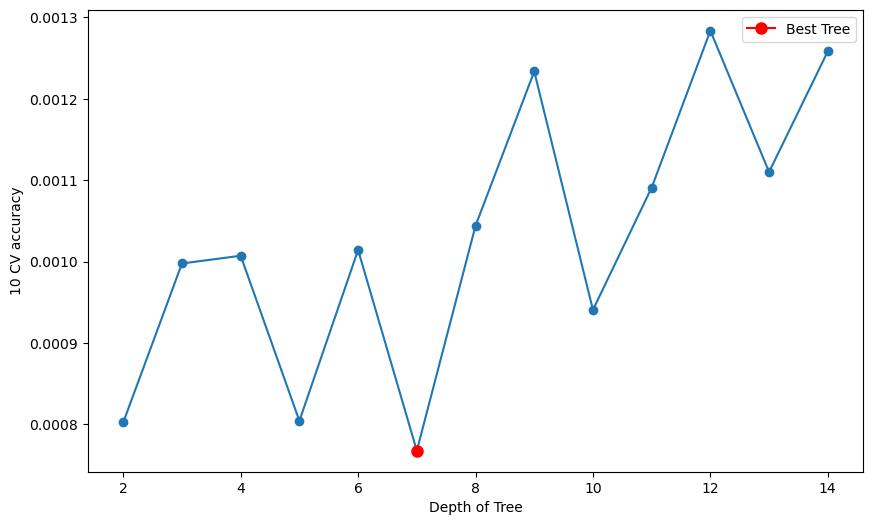

In [12]:
plt.figure(figsize = (10,6))
plt.plot(list(scores_dict.keys()),list(scores_dict.values()),marker ='o')
plt.plot(min(scores_dict, key=scores_dict.get),min(list(scores_dict.values())),marker = 'o',markersize = 8,color = 'r',label = 'Best Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('10 CV accuracy')
plt.legend()

In [13]:
best_tree = DecisionTreeRegressor(max_depth=7)

best_tree.fit(X,y)
print('Training score ',best_tree.score(X,y))
print('Test score ',best_tree.score(X_test,y_test))

Training score  0.946787791653691
Test score  -0.8322594475182177


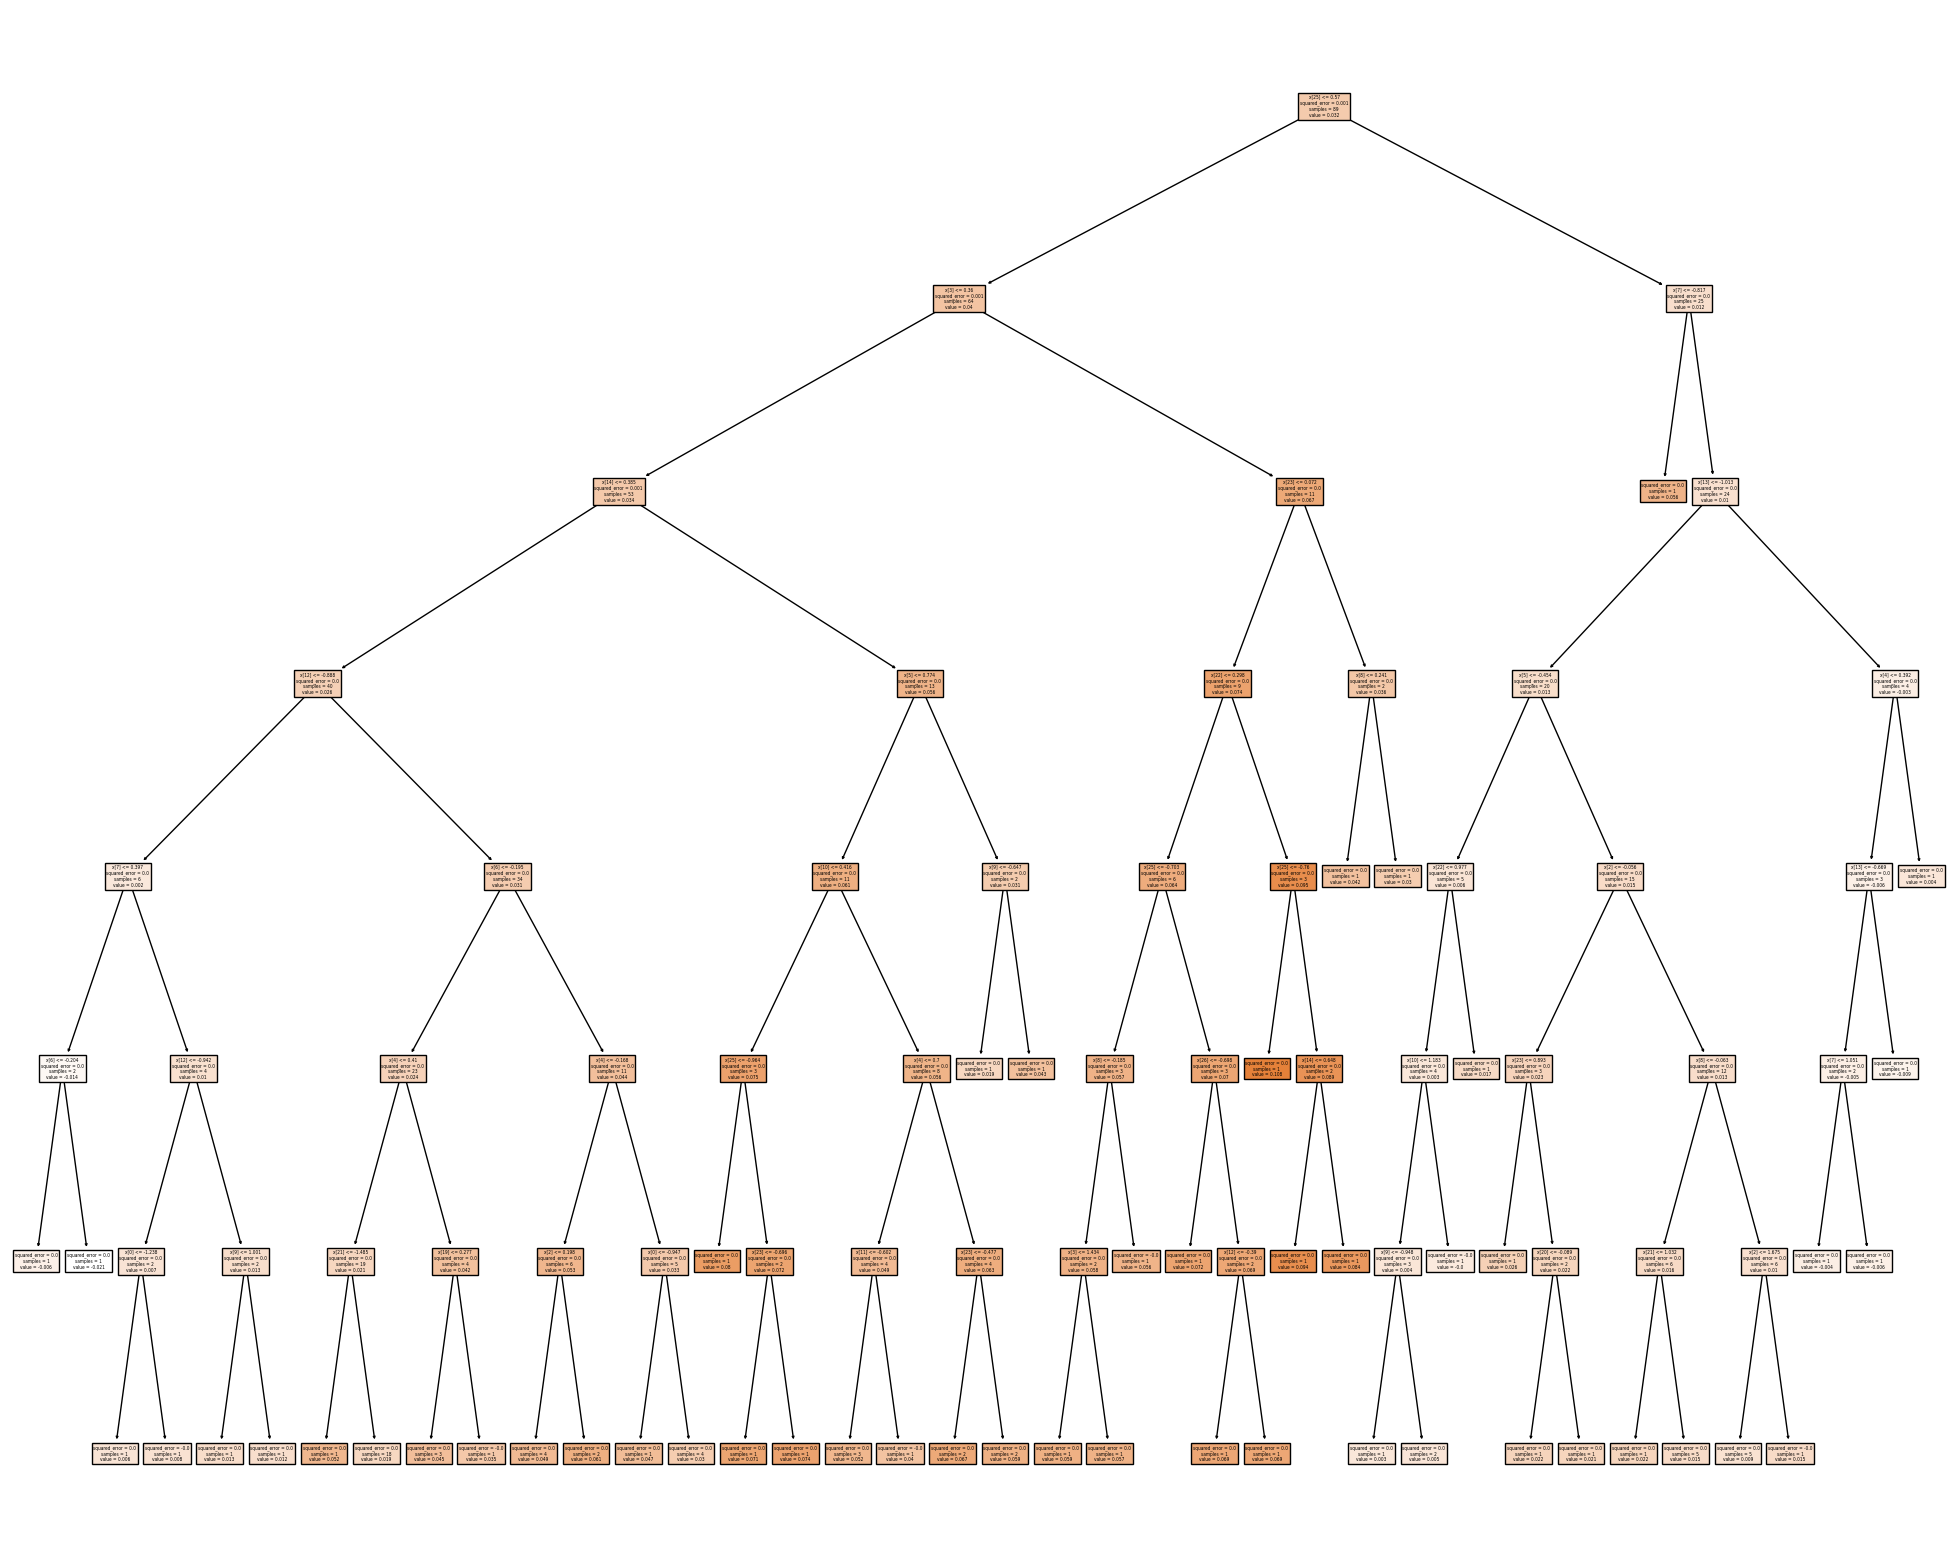

In [14]:
# Draw graph
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_tree, filled=True)

Random Forest

In [15]:
rf = RandomForestRegressor(max_features = 9) 
rf.fit(X,y)
print('Training score ',rf.score(X,y))
print('Test Error ',rf.score(X_test,y_test))

Training score  0.9113448609367943
Test Error  0.08774950886847288


<Axes: >

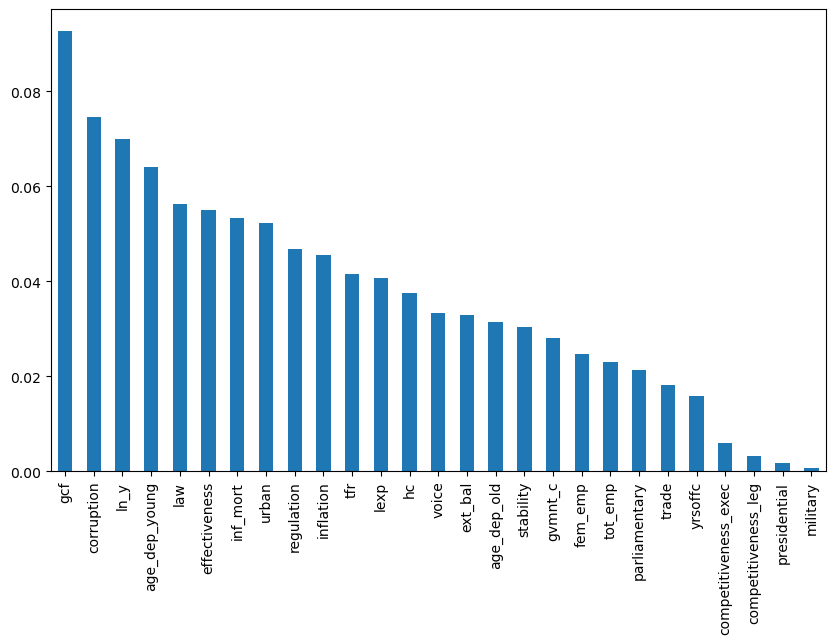

In [16]:
pd.Series(rf.feature_importances_,index = X.columns).sort_values(ascending=False).plot.bar(figsize = (10,6))